In [15]:
import matplotlib.pylab as plt
from matplotlib import *
import numpy as np
from numpy import *
from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split 

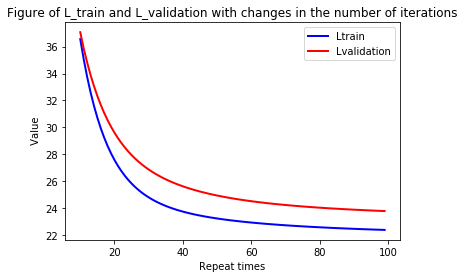

In [16]:
mem = Memory("./mycache")
@mem.cache
def get_data():
    data = load_svmlight_file("housing.txt")
    return data[0], data[1]
#导入数据
X, y = get_data()   
# 修改y格式：数组变为矩阵
Y=mat(y).T 
# 划分训练集以及验证集
X_train, X_validation, Y_train, Y_validation = train_test_split(  X, Y, test_size=0.22, random_state=42)
# 修改X_train格式
X1_train=mat(np.column_stack((X_train.todense(),ones(X1_train.shape[0])))) 
# 修改X_validation格式
X1_validation=mat(np.column_stack((X_validation.todense(),ones(X1_validation.shape[0])))) 
# 选择Loss_train 函数
def computeLoss(X,y,w):     
    L=array((X*w-y))
    sum=0
    for j in range(X.shape[0]):
        sum=sum+L[j]**2
    return sum/X.shape[0]
#参数全零初始化
w=mat(zeros((14,1))) 
L_train=[]
count=[]
L_validation=[]
#学习率
eta=0.0004
#循环次数
times=100
# 梯度下降 公式为 参数w=w-学习率*（2*X.T*（X*w-Y））
for i in range(times):  
    w=w-theta*(2*(X1_train.T)*(X1_train*w-Y_train))
    L_train.append(computeLoss(X1_train,Y_train,w)[0])
    L_validation.append(computeLoss(X1_validation,Y_validation,w)[0])
for i in range(10,times):
    count.append(i)
#画图部分
x = count
L1_train=[]
L1_validation=[]
for i in range(10,times):
    L1_train.append(L_train[i])
for i in range(10,times):
    L1_validation.append(L_validation[i])
y1 = L1_train
y2=L1_validation
plt.plot(x,y1,"b-",linewidth=2,label='Ltrain')
plt.plot(x,y2,"r-",linewidth=2,label='Lvalidation')
plt . ylabel (" Value"  )  
plt . xlabel ("Repeat times"  )  
plt . title ('Figure of L_train and L_validation with changes in the number of iterations')    
plt.legend()  
plt.show()  